# Perceptron Algorithm from Scratch

## Ingredients

In [2]:
import numpy as np
from numpy.random import normal
import random

def make_dataset(center1, center2, num_examples):
    dataset = list()
    
    # features for Class 0
    f1 = normal(loc=center1, size=num_examples)
    f2 = normal(loc=center1, size=num_examples)

    # features for Class 1
    f3 = normal(loc=center2, size=num_examples)
    f4 = normal(loc=center2, size=num_examples) 
    
    # Adding features and corresponding class to the dataset
    for i in range(num_examples):
        dataset.append([f1[i], f2[i], 0])
        dataset.append([f3[i], f4[i], 1])
    
    # shuffling dataset to remove bias    
    random.shuffle(dataset)
    return np.array(dataset)

myDataset = make_dataset(center1=0, center2=5, num_examples=50)
myDataset[:5]

array([[ 1.67259657,  0.40835454,  0.        ],
       [ 1.53634432,  0.83432141,  0.        ],
       [ 5.77735008,  6.02352774,  1.        ],
       [ 2.68151982, -0.57319105,  0.        ],
       [-0.2895593 ,  1.57850115,  0.        ]])

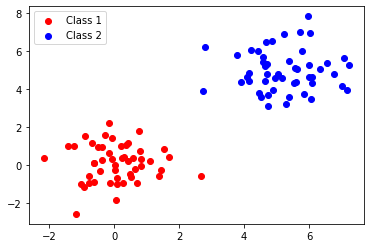

In [3]:
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    # extracting features and classes (labels) from dataset
    feature1 = dataset[:, 0]
    feature2 = dataset[:, 1]
    label = dataset[:, -1]
    
    # adding the points as scatter plot with different colors
    plt.scatter(feature1[label==0], feature2[label==0], c='r')
    plt.scatter(feature1[label==1], feature2[label==1], c='b')
    plt.legend(["Class 1", "Class 2"])
    plt.show()

plot_dataset(myDataset)

In [4]:
from math import floor
def split_dataset(dataset, test_size):
    # Calculating the point of split in the dataset
    pivot = floor(len(dataset) * (1 - test_size))
    
    # Labels are the last entries in dataset, remaining are features
    X = [example[:-1] for example in dataset]
    y = [example[-1] for example in dataset]
    
    # Points before the pivot go to training set, rest to testing set
    X_train = np.array(X[:pivot])
    X_test = np.array(X[pivot:])
    y_train = y[:pivot]
    y_test = y[pivot:]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataset(myDataset, test_size = 0.2)

## Equipment

In [5]:
def weighted_sum(weights, bias, inputs):
    summation = 0
    
    for i in range(len(weights)):
        summation += weights[i] * inputs[i]
        
    return summation + bias

In [6]:
def threshold(summation):
    if summation > 0:
        return 1
    else:
        return 0

In [7]:
def activation(weights, bias, inputs):
    # calculating weighted sum
    weighted_sum = sum([weights[i] * inputs[i] for i in range(len(weights))])
    weighted_sum += bias
    
    # perceptron fires if weighted sum is above 0 
    return 1 if weighted_sum > 0 else 0

## Directions

In [8]:
def train(weights, bias, X, y, lr = 1, epochs = 100):
    for _ in range(epochs):
        for i in range(len(X)):
            # Calculating activation for each training dataset example
            example = X[i]
            y_pred = activation(weights, bias, example)
            
            # Updating the weights and bias using update rule
            for j in range(len(weights)):
                weights[j] += lr * (y[i] - y_pred) * example[j]
            
            bias += lr * (y[i] - y_pred)
    return weights, bias

# Shape of weights is determined by number of features. 
# X_train has shape (num_training_examples, features)
weights = np.random.rand(X_train.shape[1])
bias = 0

# Training the perceptron
new_weights, new_bias = train(weights, bias, X_train, y_train)

# Calculating activation of each test point as prediction
predictions = [activation(new_weights, new_bias, X_test[i]) 
                                    for i in range(len(X_test))]

In [9]:
def accuracy(actual, predicted):
    correct  = sum([1 for i in range(len(actual)) 
                          if actual[i]==predicted[i] ])
    return correct/len(actual)

print(accuracy(y_test, predictions))

1.0


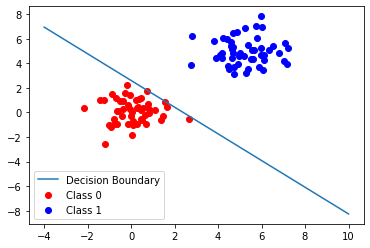

In [10]:
# equation = w1x + w2y + b = 0
# y = (-b - w1x)/w2
def decision_boundary(dataset, weights, bias):
    # Selecting range of X-coordinate
    x = np.linspace(-4, 10, 100)

    # Simplifying decision boundary equation for Y-coordinate
    y = (-bias - weights[0] * x)/weights[1]
    plt.plot(x, y)
    
    # Plotting the points in dataset
    f1, f2 = dataset[:, 0], dataset[:, 1]
    label = dataset[:, -1]
    plt.scatter(f1[label==0], f2[label==0], c='r')
    plt.scatter(f1[label==1], f2[label==1], c='b')
    plt.legend(["Decision Boundary", "Class 0", "Class 1"])
    plt.show()

decision_boundary(myDataset, new_weights, new_bias)

# Complete Code 

Let us combine all the steps in the recipe into a single Perceptron class.

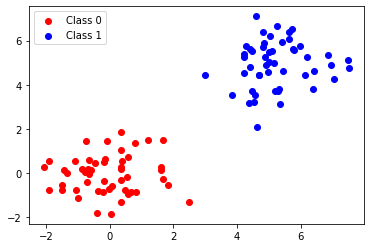

Accuracy of the model is 100.0 %!


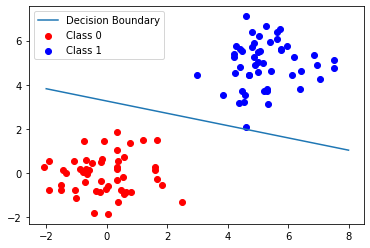

In [1]:
import numpy as np
from numpy.random import normal
import random
import matplotlib.pyplot as plt
from math import floor

# ----- Defining the Perceptron Class ----- #
class Perceptron:
    def __init__(self, num_features):
        self.weights = np.random.rand(num_features)
        self.bias = 0

    def activation(self, inputs):
        weighted_sum = sum([self.weights[i] * inputs[i] 
                                for i in range(len(self.weights))])
        return 1 if weighted_sum + self.bias > 0 else 0

    def train(self, inputs, labels, lr = 1, epochs = 100):
        for _ in range(epochs):
            for i in range(len(inputs)):
                example = inputs[i]
                y_pred = self.activation(example)

                for j in range(len(self.weights)):
                    self.weights[j] += lr * (labels[i] - y_pred) * example[j]

                self.bias += lr * (labels[i] - y_pred)

# ----- Creating a dataset with two classes ----- #
def make_dataset(center1, center2, num_examples):
    dataset = list()
    f1 = normal(loc=center1, size=num_examples)
    f2 = normal(loc=center1, size=num_examples)
    f3 = normal(loc=center2, size=num_examples)
    f4 = normal(loc=center2, size=num_examples) 
    for i in range(num_examples):
        dataset.append([f1[i], f2[i], 0])
        dataset.append([f3[i], f4[i], 1])   
    random.shuffle(dataset)
    return np.array(dataset)

# ----- Preparing Training and Test Datasets ----- #
def split_dataset(dataset, test_size):
    pivot = floor(len(dataset) * (1 - test_size))
    X = [example[:-1] for example in dataset]
    y = [example[-1] for example in dataset]
    X_train, X_test = np.array(X[:pivot]), np.array(X[pivot:])
    y_train, y_test = y[:pivot], y[pivot:]
    return X_train, X_test, y_train, y_test

# ----- Plotting Dataset Points ----- #
def plot_dataset(dataset):
    feature1 = dataset[:, 0]
    feature2 = dataset[:, 1]
    label = dataset[:, -1]
    plt.scatter(feature1[label==0], feature2[label==0], c='r')
    plt.scatter(feature1[label==1], feature2[label==1], c='b')
    plt.legend(["Class 0", "Class 1"])
    plt.show()

# ----- Plotting Decision boundary with Dataset points ----- #
def decision_boundary(dataset, weights, bias):
    x = np.linspace(-2, 8, 100)
    y = (-bias - weights[0] * x)/weights[1]
    plt.plot(x, y)
    f1, f2 = dataset[:, 0], dataset[:, 1]
    label = dataset[:, -1]
    plt.scatter(f1[label==0], f2[label==0], c='r')
    plt.scatter(f1[label==1], f2[label==1], c='b')
    plt.legend(["Decision Boundary", "Class 0", "Class 1"])
    plt.show()

# ----- Calculating accuracy of the model ---- #
def accuracy(actual, predicted):
    correct  = sum([1 for i in range(len(actual)) 
                          if actual[i]==predicted[i]])
    return correct/len(actual)


# --------------- MAIN PROGRAM EXECUTION --------------- #

# ----- Creating Dataset and training/testing splits -----#
myDataset = make_dataset(center1=0, center2=5, num_examples=50)
X_train, X_test, y_train, y_test = split_dataset(myDataset, test_size = 0.2)

# ----- Plotting points for visualization ----- #
plot_dataset(myDataset)

# ----- Using Perceptron Class to learn decision boundary ----- #
myPerceptron = Perceptron(num_features = X_train.shape[1])
myPerceptron.train(X_train, y_train, lr = 1, epochs = 100)

# ----- Calculating accuracy of our Perceptron ----- #
predictions = [myPerceptron.activation(X_test[i]) 
                                 for i in range(len(X_test))]
print(f"Accuracy of the model is {accuracy(y_test, predictions) * 100} %!")

# ----- Plotting the decision boundary ----- #
decision_boundary(myDataset, myPerceptron.weights, myPerceptron.bias)